In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv('data/prep_train.csv')
val = pd.read_csv('data/prep_val.csv')

In [ ]:
texts = df.text.tolist()
lemm_texts = df.lemm_text.tolist()

In [ ]:
!pip install --quiet natasha

In [3]:
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    
    NewsNERTagger,

    PER,
    DatesExtractor,
    MoneyExtractor,
    AddrExtractor,
    
    Doc
)

In [4]:
morph_vocab = MorphVocab()


segmenter = Segmenter()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

dates_extractor = DatesExtractor(morph_vocab)
money_extractor = MoneyExtractor(morph_vocab)
addr_extractor = AddrExtractor(morph_vocab)
ner_tagger = NewsNERTagger(emb)

In [12]:
doc = Doc('благотворительный фонд Константина Хабенского')

In [13]:
doc.segment(segmenter)

In [14]:
doc.tag_ner(ner_tagger)

In [19]:
doc.spans[0].text

'Константина Хабенского'

In [20]:
ner_text_natasha('благотворительный фонд Твори Добро')

[DocSpan(start=23, stop=34, type='PER', text='Твори Добро', tokens=[...])]

In [1]:
def ner_text_natasha(text):
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_ner(ner_tagger)
    return doc.spans

In [18]:
ner_text_natasha(train.loc[3, 'text'])

Минстрой обозначил способы снижения энергоемкости российской экономики.
[DocSpan(stop=8, type='ORG', text='Минстрой', tokens=[...])]
1


1

In [21]:
from tqdm.auto import tqdm

In [51]:
train['ner'] = train['text'].apply(ner_text_natasha)

In [49]:
train['ner'] = train['ner'] / train['lemm_text'].apply(lambda x: len(x.split()))

In [50]:
train['ner']

0         0.000000
1         0.000450
2         0.000000
3         0.002012
4         0.001012
            ...   
129061    0.000124
129062    0.000000
129063    0.000000
129064    0.000000
129065    0.000726
Name: ner, Length: 129066, dtype: float64

In [26]:
train.groupby('class')['ner'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
H,64535.0,1.969598,4.178336,0.0,0.0,1.0,2.0,60.0
M,64531.0,1.692737,3.736725,0.0,0.0,1.0,2.0,96.0


In [44]:
train.groupby('class')['ner'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
0,64535.0,0.009018,0.012388,0.0,0.0,0.003295,0.014493,0.142857
1,64531.0,0.007761,0.010963,0.0,0.0,0.001869,0.012658,0.153846


C:\Users\huawei\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\huawei\anaconda3\lib\site-packages\seaborn\distributions.py:2595: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\huawei\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\huawei\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


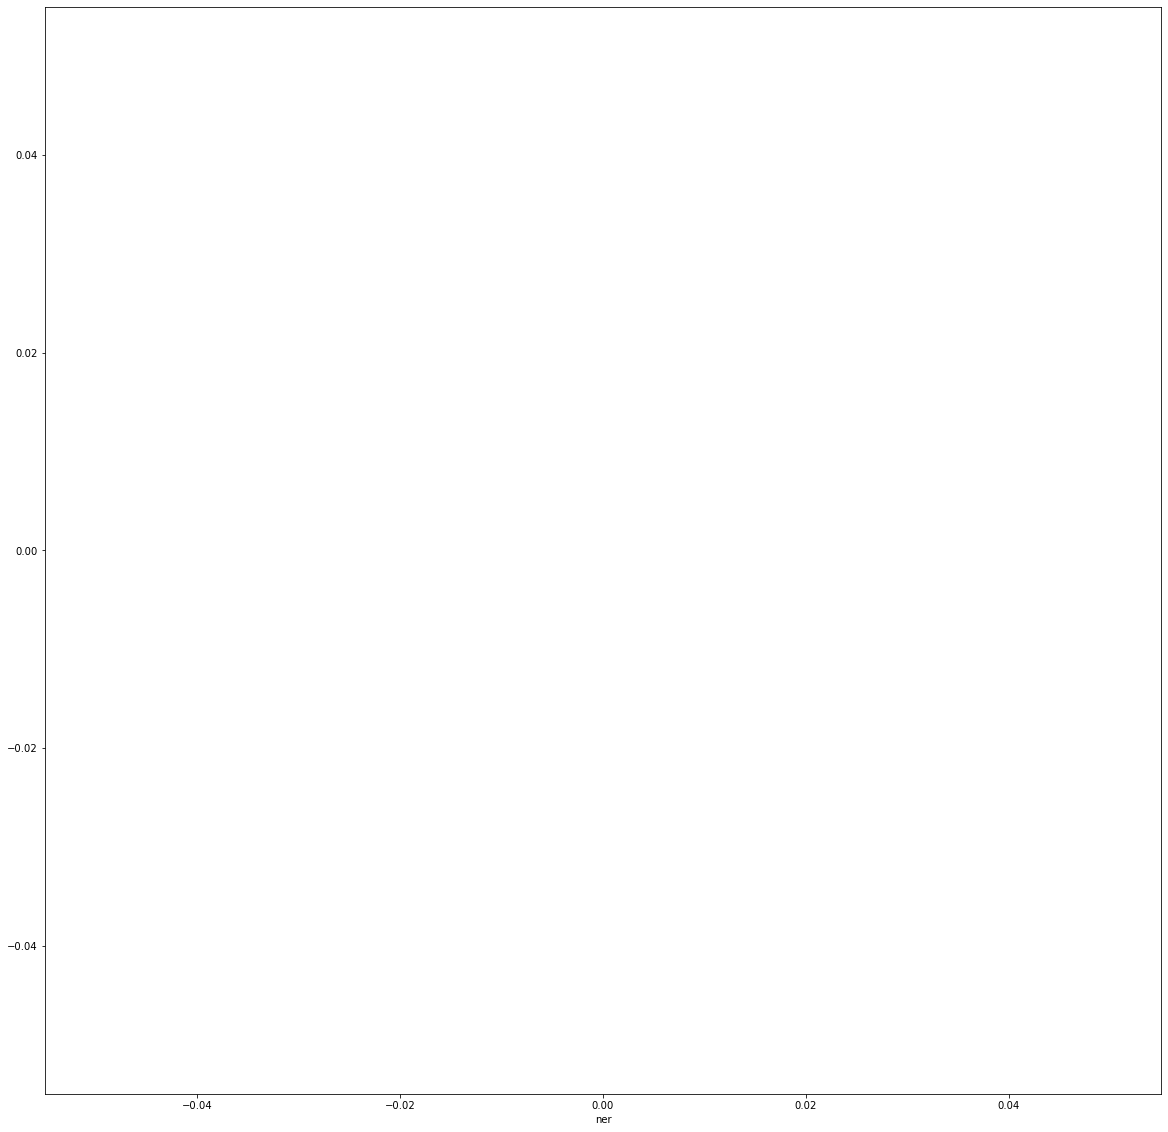

In [48]:
plt.figure(figsize=(20,20))
sns.distplot(train[train['class'] == 'M']['ner'])
sns.distplot(train[train['class'] == 'H']['ner'])
plt.show()

In [36]:
train['class'] = train['class'].map({'H': 0, 'M': 1})

<AxesSubplot:>

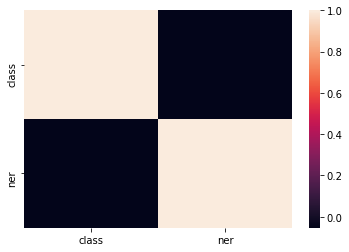

In [46]:
sns.heatmap(train[['class', 'ner']].corr())

In [47]:
train[['class', 'ner']].corr()

,class,ner
class,1.000000,-0.053624
ner,-0.053624,1.000000
